**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_train = np.array(X).astype('float64')
        self.y_train = np.array(y).astype('int64')
        self.classes = np.unique(y)
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.X_train)
        return self

    def predict(self, X):
        X = np.array(X).astype('float64')
        return np.apply_along_axis(self._argmax, 1, self._kneighbors(X))

    def predict_proba(self, X):
        X = np.array(X).astype('float64')
        return np.apply_along_axis(self._probability, 1, self._kneighbors(X))

    def score(self, X, y):
        return (self.predict(X) == y).mean()

    def _kneighbors(self, X):
        if self.algorithm == 'brute':
            distances = metrics.pairwise_distances(X, self.X_train)
            n_neighbors_indexes = np.argsort(distances)[:, :self.n_neighbors]
        if self.algorithm == 'kd_tree':
            _, n_neighbors_indexes = self.tree.query(X, k=self.n_neighbors)
        return self.y_train[n_neighbors_indexes].astype('int64')

    def _argmax(self, array):
        return np.bincount(array).argmax()

    def _probability(self, array):
        classes_distr = np.bincount(array, minlength=len(self.classes))
        return classes_distr / self.n_neighbors


**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.23 ms, sys: 912 µs, total: 2.14 ms
Wall time: 1.45 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 145 µs, sys: 66 µs, total: 211 µs
Wall time: 170 µs


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [8]:
%time clf.predict(X_test)

CPU times: user 1.35 ms, sys: 433 µs, total: 1.79 ms
Wall time: 1.53 ms


array([1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 2.04 ms, sys: 1.62 ms, total: 3.66 ms
Wall time: 2.2 ms


array([1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.39 ms, sys: 442 µs, total: 1.83 ms
Wall time: 1.46 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.52 ms, sys: 763 µs, total: 2.28 ms
Wall time: 1.52 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

Best k: 20 with score: 0.9925925925925926


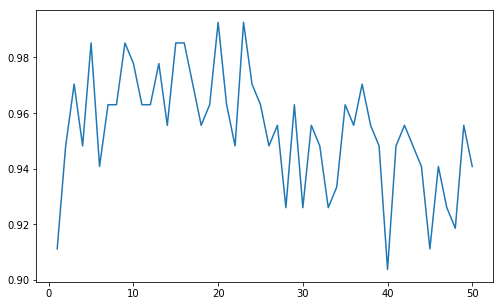

In [14]:
tests_count = 10
max_neighbours_count = 50

best_score = 0.0
best_k = 0
k_result = []

for k in range(1, max_neighbours_count + 1):
    test_result = []
    for test in range(1, tests_count):
        X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                            iris.target, test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=k)
        my_clf.fit(X_train, y_train)
        test_result.append(my_clf.score(X_test, y_test))
    test_mean = np.mean(test_result)
    k_result.append(test_mean)
    if best_score < test_mean:
        best_score = test_mean
        best_k = k
    
print("Best k:", best_k, "with score:", best_score)

fig = plt.figure(figsize=(18,11))
ax1 = fig.add_subplot(221)
sns.lineplot(x=range(1, max_neighbours_count + 1), y=k_result)


**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

/Users/irina/homebrew/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/irina/homebrew/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 48.5 s, sys: 710 ms, total: 49.2 s
Wall time: 49.7 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 206 ms, sys: 248 ms, total: 453 ms
Wall time: 493 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [20]:
%time clf.predict(X_test)

CPU times: user 1min 11s, sys: 519 ms, total: 1min 12s
Wall time: 1min 13s


array([5., 9., 3., 9., 7., 1., 0., 0., 8., 2., 2., 0., 5., 6., 3., 2., 7.,
       2., 7., 6., 9., 3., 1., 8., 9., 8., 2., 1., 5., 8., 0., 2., 7., 9.,
       5., 0., 9., 9., 6., 9., 3., 1., 9., 7., 0., 0., 0., 2., 1., 3., 2.,
       4., 1., 3., 8., 0., 1., 9., 2., 9., 4., 7., 0., 2., 9., 8., 6., 1.,
       1., 2., 6., 7., 4., 7., 4., 0., 4., 6., 4., 3., 8., 9., 1., 6., 7.,
       5., 6., 8., 7., 0., 1., 6., 9., 4., 5., 8., 7., 8., 2., 7., 4., 8.,
       1., 0., 3., 7., 5., 5., 6., 9., 5., 0., 7., 8., 8., 0., 6., 4., 5.,
       8., 4., 7., 8., 0., 4., 8., 1., 4., 6., 7., 8., 1., 9., 4., 2., 6.,
       7., 9., 3., 6., 3., 4., 4., 1., 8., 6., 3., 6., 0., 0., 6., 7., 3.,
       5., 1., 2., 3., 4., 8., 5., 1., 1., 6., 8., 6., 0., 3., 0., 8., 6.,
       8., 7., 3., 4., 0., 1., 7., 3., 7., 9., 1., 1., 8., 8., 8., 8., 0.,
       9., 4., 3., 3., 9., 1., 9., 3., 6., 0., 7., 5., 1., 0., 7., 5., 1.,
       9., 3., 9., 6., 2., 2., 9., 3., 2., 9., 7., 1., 4., 7., 5., 2., 4.,
       5., 7., 4., 1., 7.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 10.6 s, sys: 639 ms, total: 11.2 s
Wall time: 9.44 s


array([5, 9, 3, 9, 7, 1, 0, 0, 8, 2, 2, 0, 5, 6, 3, 2, 7, 2, 7, 6, 9, 3,
       1, 8, 9, 8, 2, 1, 5, 8, 0, 2, 7, 9, 5, 0, 9, 9, 6, 9, 3, 1, 9, 7,
       0, 0, 0, 2, 1, 3, 2, 4, 1, 3, 8, 0, 1, 9, 2, 9, 4, 7, 0, 2, 9, 8,
       6, 1, 1, 2, 6, 7, 4, 7, 4, 0, 4, 6, 4, 3, 8, 9, 1, 6, 7, 5, 6, 8,
       7, 0, 1, 6, 9, 4, 5, 8, 7, 8, 2, 7, 4, 8, 1, 0, 3, 7, 5, 5, 6, 9,
       5, 0, 7, 8, 8, 0, 6, 4, 5, 8, 4, 7, 8, 0, 4, 8, 1, 4, 6, 7, 8, 1,
       9, 4, 2, 6, 7, 9, 3, 6, 3, 4, 4, 1, 8, 6, 3, 6, 0, 0, 6, 7, 3, 5,
       1, 2, 3, 4, 8, 5, 1, 1, 6, 8, 6, 0, 3, 0, 8, 6, 8, 7, 3, 4, 0, 1,
       7, 3, 7, 9, 1, 1, 8, 8, 8, 8, 0, 9, 4, 3, 3, 9, 1, 9, 3, 6, 0, 7,
       5, 1, 0, 7, 5, 1, 9, 3, 9, 6, 2, 2, 9, 3, 2, 9, 7, 1, 4, 7, 5, 2,
       4, 5, 7, 4, 1, 7, 6, 5, 5, 2, 8, 4, 8, 3, 1, 3, 5, 9, 9, 9, 6, 8,
       8, 5, 6, 4, 7, 6, 0, 5, 6, 3, 3, 0, 5, 8, 8, 6, 1, 9, 0, 0, 0, 9,
       2, 0, 6, 6, 1, 0, 7, 4, 3, 3, 3, 7, 8, 2, 0, 1, 5, 4, 6, 1, 1, 5,
       9, 7, 1, 2, 4, 4, 5, 0, 1, 7, 8, 5, 3, 4, 4,

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 1min 11s, sys: 485 ms, total: 1min 11s
Wall time: 1min 12s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 9.16 s, sys: 399 ms, total: 9.56 s
Wall time: 7.71 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.97

In [25]:
my_clf.score(X_test, y_test)

0.97

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=20, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=20, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 42.7 s, sys: 473 ms, total: 43.2 s
Wall time: 43.3 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 39.3 s, sys: 565 ms, total: 39.9 s
Wall time: 40.2 s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=20)

In [30]:
%time clf.predict(X_test)

CPU times: user 1min 10s, sys: 642 ms, total: 1min 11s
Wall time: 1min 11s


array([0., 9., 0., 8., 9., 9., 4., 7., 2., 7., 7., 9., 2., 2., 6., 8., 1.,
       0., 5., 6., 0., 3., 6., 3., 9., 6., 9., 1., 2., 0., 5., 8., 4., 3.,
       9., 7., 8., 2., 2., 9., 0., 1., 9., 0., 4., 9., 3., 1., 1., 6., 3.,
       0., 3., 7., 8., 9., 5., 8., 0., 6., 6., 9., 8., 9., 0., 4., 3., 2.,
       7., 8., 3., 0., 1., 1., 0., 8., 2., 7., 5., 9., 5., 9., 3., 1., 9.,
       3., 2., 1., 9., 0., 7., 3., 1., 5., 4., 5., 3., 0., 3., 8., 4., 5.,
       5., 6., 8., 4., 1., 4., 1., 0., 6., 0., 8., 6., 8., 9., 0., 8., 4.,
       1., 5., 0., 8., 4., 7., 7., 4., 5., 0., 6., 7., 9., 0., 1., 6., 6.,
       4., 2., 8., 2., 1., 7., 3., 5., 3., 8., 7., 3., 5., 1., 6., 7., 0.,
       1., 5., 5., 0., 2., 3., 8., 0., 6., 3., 7., 6., 3., 0., 1., 6., 1.,
       2., 5., 1., 2., 2., 1., 4., 3., 3., 9., 0., 5., 4., 0., 5., 4., 2.,
       1., 7., 0., 8., 2., 2., 6., 3., 9., 1., 9., 7., 7., 5., 5., 2., 7.,
       7., 9., 8., 7., 6., 3., 9., 7., 5., 0., 8., 6., 8., 0., 2., 7., 2.,
       0., 2., 7., 4., 0.

In [31]:
%time my_clf.predict(X_test)

CPU times: user 58.4 s, sys: 393 ms, total: 58.8 s
Wall time: 59.7 s


array([0, 9, 0, 8, 9, 9, 4, 7, 2, 7, 7, 9, 2, 2, 6, 8, 1, 0, 5, 6, 0, 3,
       6, 3, 9, 6, 9, 1, 2, 0, 5, 8, 4, 3, 9, 7, 8, 2, 2, 9, 0, 1, 9, 0,
       4, 9, 3, 1, 1, 6, 3, 0, 3, 7, 8, 9, 5, 8, 0, 6, 6, 9, 8, 9, 0, 4,
       3, 2, 7, 8, 3, 0, 1, 1, 0, 8, 2, 7, 5, 9, 5, 9, 3, 1, 9, 3, 2, 1,
       9, 0, 7, 3, 1, 5, 4, 5, 3, 0, 3, 8, 4, 5, 5, 6, 8, 4, 1, 4, 1, 0,
       6, 0, 8, 6, 8, 9, 0, 8, 4, 1, 5, 0, 8, 4, 7, 7, 4, 5, 0, 6, 7, 9,
       0, 1, 6, 6, 4, 2, 8, 2, 1, 7, 3, 5, 3, 8, 7, 3, 5, 1, 6, 7, 0, 1,
       5, 5, 0, 2, 3, 8, 0, 6, 3, 7, 6, 3, 0, 1, 6, 1, 2, 5, 1, 2, 2, 1,
       4, 3, 3, 9, 0, 5, 4, 0, 5, 4, 2, 1, 7, 0, 8, 2, 2, 6, 3, 9, 1, 9,
       7, 7, 5, 5, 2, 7, 7, 9, 8, 7, 6, 3, 9, 7, 5, 0, 8, 6, 8, 0, 2, 7,
       2, 0, 2, 7, 4, 0, 4, 7, 1, 3, 9, 4, 3, 3, 1, 9, 9, 2, 1, 4, 5, 5,
       9, 9, 6, 4, 6, 1, 8, 9, 3, 7, 6, 5, 0, 6, 0, 2, 2, 5, 2, 7, 0, 6,
       4, 9, 5, 8, 9, 7, 3, 1, 8, 8, 7, 9, 6, 6, 2, 0, 7, 8, 4, 4, 6, 3,
       1, 0, 6, 4, 4, 0, 7, 5, 3, 2, 1, 9, 7, 2, 9,

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 9s, sys: 442 ms, total: 1min 10s
Wall time: 1min 11s


array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.05, 0.  , 0.95],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 57.6 s, sys: 320 ms, total: 57.9 s
Wall time: 58.5 s


array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.05, 0.  , 0.95],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

In [34]:
clf.score(X_test, y_test)

0.9671428571428572

In [35]:
my_clf.score(X_test, y_test)

0.9671428571428572

Задание 5

In [36]:
# seaborn -- библиотека для визуализации данных, оптимизирована для визуализации статистических моделей,
#     базируется на matplotlib
# matplotlib -- библиотека для визуализации данных
# train_test_split -- функция sklearn, рандомно разбивает массивы или матрицы на обучающие и 
#     тестирующие подмножества
# %load_ext Pipeline (from sklearn.pipeline import Pipeline) -- используется для последовательного
#     преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) -- приведение распределения к
#     нормальному виду, вычитание среднего значения, деление на дисперсию
# ClassifierMixin -- Мixin класс для классификаторов из sklearn, имеет метод score, вычисляющий точность
#     предсказания тестовых данных
# NeighborsBase -- базовый класс sklearn для метода ближайших соседей
# KNeighborsMixin -- Mixin класс для поиска KNN
# SupervisedIntegerMixin -- Mixin класс, содержит функцию fit(X, y), которая обучает модель,
#     используя X как данные, y как целевые переменные
